In [42]:
### DIFFERENCE BETWEEN AREAS 

In [43]:
##### 
import geopandas as gpd
import pandas as pd

# Lee el shapefile
gdf_shp = gpd.read_file("/home/polivera/Documents/NERO - Database/Turkiye/Mugla_Milasa_Karacahisar/progression_karacahisar_31072021.shp")

# Lee el GeoJSON
gdf_json = gpd.read_file("/home/polivera/Documents/NERO - Database/Reviews GeoJSONs/KaracahisarFire_new1.geojson")

# Convertir ambos atributos a datetime
gdf_shp['date_hour'] = pd.to_datetime(gdf_shp['date_hour'])
gdf_json['iso_timestamp'] = pd.to_datetime(gdf_json['iso_timestamp'])

# Seleccionar columnas relevantes
df_shp = gdf_shp[['date_hour', 'Area_QGIS']]
df_json = gdf_json[['iso_timestamp', 'area_ha']]

# Agrupar áreas por fecha/hora y sumar los valores
df_shp_grouped = df_shp.groupby('date_hour', as_index=False)['Area_QGIS'].sum()
df_json_grouped = df_json.groupby('iso_timestamp', as_index=False)['area_ha'].sum()

# Realizar el merge por la columna de fecha/hora
df_merged = pd.merge(
    df_shp_grouped,
    df_json_grouped,
    left_on='date_hour',
    right_on='iso_timestamp',
    how='inner'
)

# Ahora puedes calcular la diferencia y la media de diferencias
df_merged['diferencia'] = df_merged['Area_QGIS'] - df_merged['area_ha']
media_diferencias = df_merged['diferencia'].mean()
print("Media de diferencias:", media_diferencias)



Media de diferencias: 40.765206687359175


Media de diferencias: 40.765206687359175


/tmp/ipykernel_777013/2823953285.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shp['Area_QGIS'] = df_shp['Area_QGIS'].astype(str).str.replace(',', '.').astype(float)
/tmp/ipykernel_777013/2823953285.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_json['area_ha'] = df_json['area_ha'].astype(str).str.replace(',', '.').astype(float)


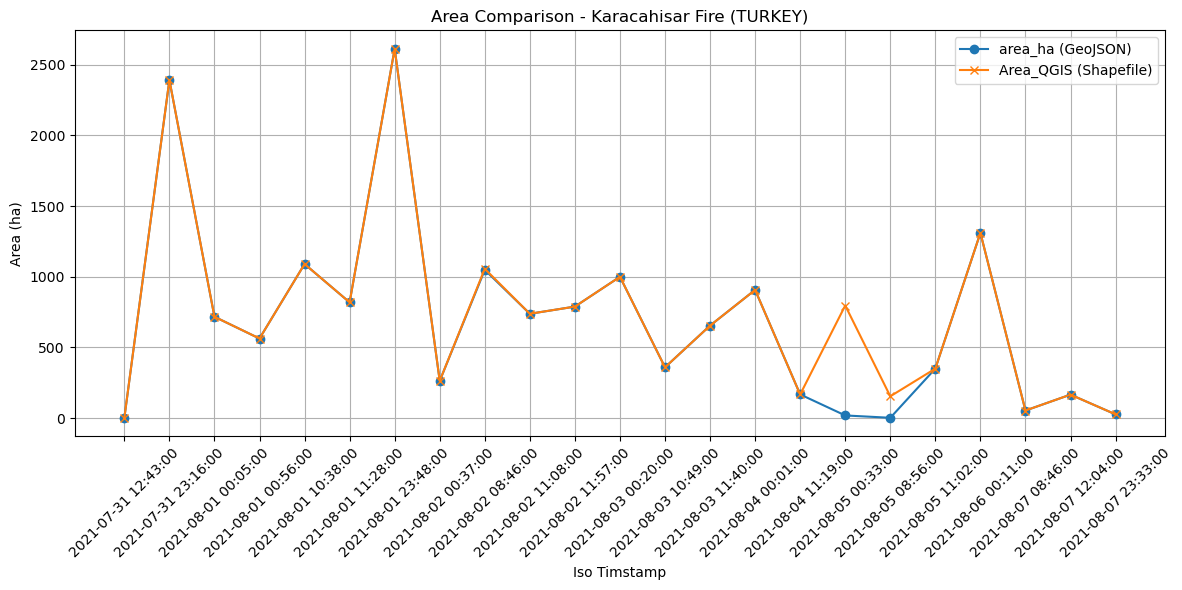

In [44]:
import matplotlib.pyplot as plt

# Reemplaza las comas por puntos y convierte a float
df_shp['Area_QGIS'] = df_shp['Area_QGIS'].astype(str).str.replace(',', '.').astype(float)
df_json['area_ha'] = df_json['area_ha'].astype(str).str.replace(',', '.').astype(float)

# Agrupar áreas por fecha/hora y sumar los valores
df_shp_grouped = df_shp.groupby('date_hour', as_index=False)['Area_QGIS'].sum()
df_json_grouped = df_json.groupby('iso_timestamp', as_index=False)['area_ha'].sum()


# Realizar el merge por la columna de fecha/hora
df_merged = pd.merge(
    df_shp_grouped,
    df_json_grouped,
    left_on='date_hour',
    right_on='iso_timestamp',
    how='inner'
)

# Ahora puedes calcular la diferencia y la media de diferencias
df_merged['diferencia'] = df_merged['Area_QGIS'] - df_merged['area_ha']
media_diferencias = df_merged['diferencia'].mean()
print("Media de diferencias:", media_diferencias)

df_merged = df_merged.sort_values(by='date_hour')


plt.figure(figsize=(12,6))

# Posiciones numéricas equiespaciadas para X
posiciones = list(range(len(df_merged)))

plt.plot(posiciones, df_merged['area_ha'], marker='o', label='area_ha (GeoJSON)')
plt.plot(posiciones, df_merged['Area_QGIS'], marker='x', label='Area_QGIS (Shapefile)')

plt.xlabel('Iso Timstamp')
plt.ylabel('Area (ha)')
plt.title('Area Comparison - Karacahisar Fire (TURKEY)')
plt.legend()
plt.grid()

# Formatear etiquetas del eje X con fechas, usando las posiciones equiespaciadas
fechas = df_merged['date_hour'].dt.strftime('%Y-%m-%d %H:%M:%S').tolist()
plt.xticks(ticks=posiciones, labels=fechas, rotation=45)

plt.tight_layout()
plt.show()




In [5]:
## MASSAROSA
import geopandas as gpd
import pandas as pd

gdf_shp = gpd.read_file("/home/polivera/Documents/NERO - Database/Italy/Massarosa_2022/mifle.shp")
gdf_json = gpd.read_file("/home/polivera/Documents/NERO - Database/Reviews GeoJSONs/MassarosaFire_new1.geojson")


# Convertir a string para evitar problemas con valores mixtos
gdf_shp['Name'] = gdf_shp['Name'].astype(str)
gdf_json['iso_timestamp'] = gdf_json['iso_timestamp'].astype(str)

# Separar filas con 'Finale'
df_shp_finale = gdf_shp[gdf_shp['Name'] == 'Finale'][['Name', 'Area_QGIS']]
df_json_finale = gdf_json[gdf_json['iso_timestamp'] == 'Finale'][['iso_timestamp', 'area_ha']]

# Separar filas que no son 'Finale'
df_shp_fecha = gdf_shp[gdf_shp['Name'] != 'Finale'].copy()
df_json_fecha = gdf_json[gdf_json['iso_timestamp'] != 'Finale'].copy()

# Convertir fechas, ignorando errores
df_shp_fecha['Name'] = pd.to_datetime(df_shp_fecha['Name'], errors='coerce')
df_json_fecha['iso_timestamp'] = pd.to_datetime(df_json_fecha['iso_timestamp'], errors='coerce')

# Agrupar sumando valores para fechas
df_shp_grouped = df_shp_fecha.groupby('Name', as_index=False)['Area_QGIS'].sum()
df_json_grouped = df_json_fecha.groupby('iso_timestamp', as_index=False)['area_ha'].sum()

# Sumar valores 'Finale'
shp_finale_sum = df_shp_finale['Area_QGIS'].sum()
json_finale_sum = df_json_finale['area_ha'].sum()

# Añadir fila 'Finale' al DataFrame agrupado si existen datos
if shp_finale_sum > 0:
    df_shp_grouped = pd.concat([df_shp_grouped, pd.DataFrame({'Name': ['Finale'], 'Area_QGIS': [shp_finale_sum]})], ignore_index=True)

if json_finale_sum > 0:
    df_json_grouped = pd.concat([df_json_grouped, pd.DataFrame({'iso_timestamp': ['Finale'], 'area_ha': [json_finale_sum]})], ignore_index=True)

# Merge por la columna fecha/hora o 'Finale'
df_merged = pd.merge(
    df_shp_grouped,
    df_json_grouped,
    left_on='Name',
    right_on='iso_timestamp',
    how='inner'
)

# Calcular diferencia y media
df_merged['diferencia'] = df_merged['Area_QGIS'] - df_merged['area_ha']
media_diferencias = df_merged['diferencia'].mean()
print("Media de diferencias:", media_diferencias)

Media de diferencias: 0.15863042837075533


/tmp/ipykernel_781013/240223444.py:22: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_shp_fecha['Name'] = pd.to_datetime(df_shp_fecha['Name'], errors='coerce')
/tmp/ipykernel_781013/240223444.py:23: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_json_fecha['iso_timestamp'] = pd.to_datetime(df_json_fecha['iso_timestamp'], errors='coerce')


Media de diferencias: 0.15863042837075533


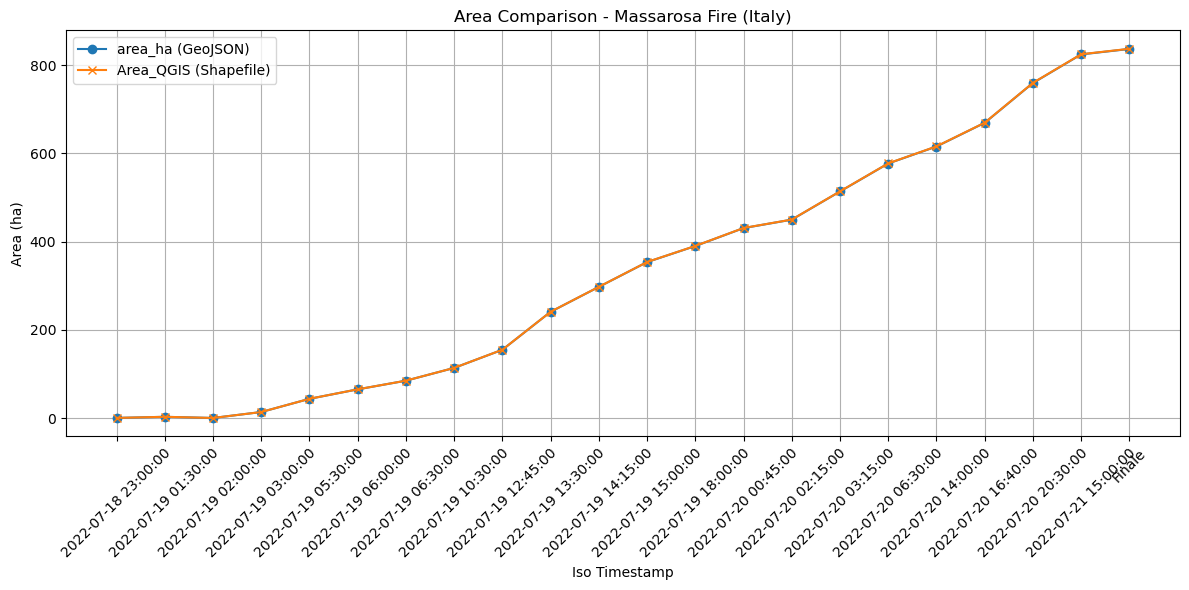

In [12]:
import matplotlib.pyplot as plt

# Reemplazar comas y convertir áreas a float
df_shp_grouped['Area_QGIS'] = df_shp_grouped['Area_QGIS'].astype(str).str.replace(',', '.').astype(float)
df_json_grouped['area_ha'] = df_json_grouped['area_ha'].astype(str).str.replace(',', '.').astype(float)

# Calcular diferencia y media (ya hecho antes, pero por seguridad)
df_merged['diferencia'] = df_merged['Area_QGIS'] - df_merged['area_ha']
media_diferencias = df_merged['diferencia'].mean()
print("Media de diferencias:", media_diferencias)

# Crear una columna auxiliar para ordenar (Fechas normales primero, 'Finale' al final)
def sort_helper(x):
    if x == 'Finale':
        return pd.Timestamp.max
    else:
        return x

df_merged['sort_key'] = df_merged['Name'].apply(sort_helper)

# Ordenar por la columna auxiliar
df_merged = df_merged.sort_values(by='sort_key')

# Eliminar la columna auxiliar para limpieza
df_merged = df_merged.drop(columns=['sort_key'])


# Ordenar por 'Name' para mantener el orden lógico
#df_merged = df_merged.sort_values(by='Name')

plt.figure(figsize=(12,6))

# Posiciones equiespaciadas para eje X
posiciones = list(range(len(df_merged)))

plt.plot(posiciones, df_merged['area_ha'], marker='o', label='area_ha (GeoJSON)')
plt.plot(posiciones, df_merged['Area_QGIS'], marker='x', label='Area_QGIS (Shapefile)')

plt.xlabel('Iso Timestamp')
plt.ylabel('Area (ha)')
plt.title('Area Comparison - Massarosa Fire (Italy)')
plt.legend()
plt.grid()

# Usar etiquetas completas como string para eje X
fechas = df_merged['Name'].astype(str).tolist()
plt.xticks(ticks=posiciones, labels=fechas, rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
### CALCI


Media de diferencias: 31.31361814348418


/tmp/ipykernel_781013/4080278513.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shp['Area_QGIS'] = df_shp['Area_QGIS'].astype(str).str.replace(',', '.').astype(float)
/tmp/ipykernel_781013/4080278513.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_json['area_ha'] = df_json['area_ha'].astype(str).str.replace(',', '.').astype(float)
/tmp/ipykernel_781013/4080278513.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure pa

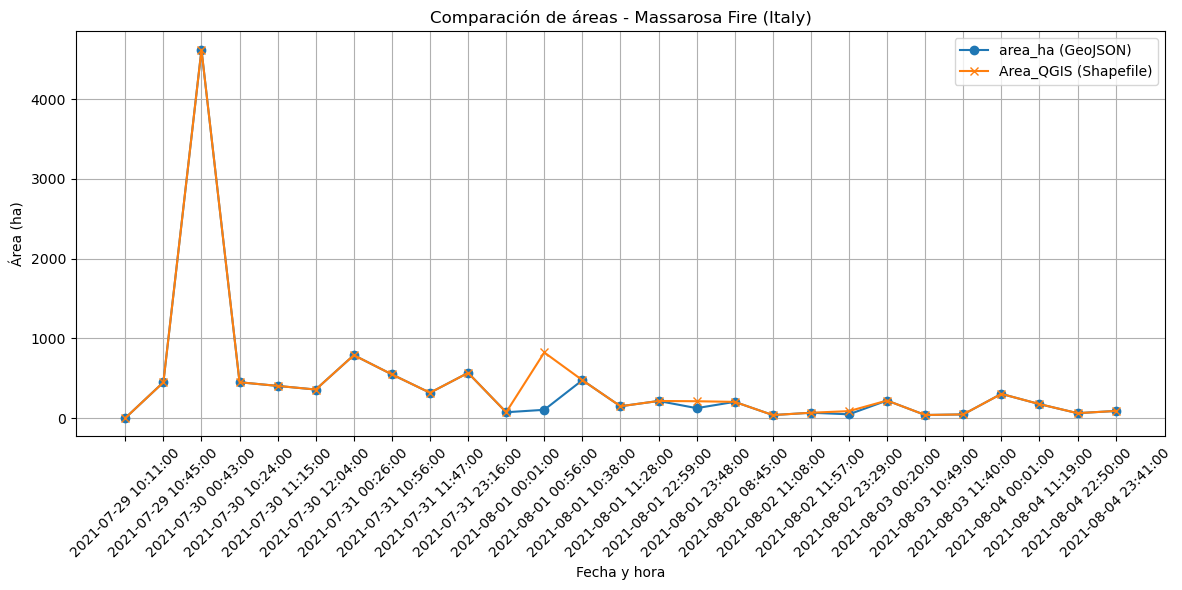

In [14]:
### MARMARIS
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

gdf_shp = gpd.read_file("/home/polivera/Documents/NERO - Database/Turkiye/Mugla_Marmaris/progression_marmaris_29072021.shp")
gdf_json = gpd.read_file("/home/polivera/Documents/NERO - Database/Reviews GeoJSONs/MarmarisFire_new1.geojson")

# Convertir la columna 'date_hour' e 'iso_timestamp' a string para evitar problemas con NaN
gdf_shp['date_hour'] = gdf_shp['date_hour'].astype(str)
gdf_json['iso_timestamp'] = gdf_json['iso_timestamp'].astype(str)

# Seleccionar columnas relevantes
df_shp = gdf_shp[['date_hour', 'Area_QGIS']]
df_json = gdf_json[['iso_timestamp', 'area_ha']]

df_shp['Area_QGIS'] = df_shp['Area_QGIS'].astype(str).str.replace(',', '.').astype(float)
df_json['area_ha'] = df_json['area_ha'].astype(str).str.replace(',', '.').astype(float)


# Filtrar filas con date_hour o iso_timestamp siendo NaN equivalente (no string 'nan', los valores reales NaN sólo al convertir luego)
df_shp = df_shp[df_shp['date_hour'].notna() & (df_shp['date_hour'] != 'nan')]
df_json = df_json[df_json['iso_timestamp'].notna() & (df_json['iso_timestamp'] != 'nan')]

# Convertir a datetime directamente (ignorando errores)
df_shp['date_hour'] = pd.to_datetime(df_shp['date_hour'], errors='coerce')
df_json['iso_timestamp'] = pd.to_datetime(df_json['iso_timestamp'], errors='coerce')

# Sacar filas que quedaron con NaT tras conversión y eliminarlas
df_shp = df_shp.dropna(subset=['date_hour'])
df_json = df_json.dropna(subset=['iso_timestamp'])

# Agrupar sumando área por fecha/hora
df_shp_grouped = df_shp.groupby('date_hour', as_index=False)['Area_QGIS'].sum()
df_json_grouped = df_json.groupby('iso_timestamp', as_index=False)['area_ha'].sum()

df_shp = df_shp.drop_duplicates(['date_hour', 'Area_QGIS'])
df_json = df_json.drop_duplicates(['iso_timestamp', 'area_ha'])



# Hacer merge por fecha/hora
df_merged = pd.merge(df_shp_grouped, df_json_grouped, left_on='date_hour', right_on='iso_timestamp', how='inner')

# Calcular diferencia y media
df_merged['diferencia'] = df_merged['Area_QGIS'] - df_merged['area_ha']
media_diferencias = df_merged['diferencia'].mean()
print("Media de diferencias:", media_diferencias)

# Ordenar por fecha
df_merged = df_merged.sort_values(by='date_hour')

# Graficar
plt.figure(figsize=(12,6))
posiciones = list(range(len(df_merged)))

plt.plot(posiciones, df_merged['area_ha'], marker='o', label='area_ha (GeoJSON)')
plt.plot(posiciones, df_merged['Area_QGIS'], marker='x', label='Area_QGIS (Shapefile)')

plt.xlabel('Fecha y hora')
plt.ylabel('Área (ha)')
plt.title('Comparación de áreas - Massarosa Fire (Italy)')
plt.legend()
plt.grid()

# Mostrar fechas como etiquetas equiespaciadas en eje X
fechas = df_merged['date_hour'].dt.strftime('%Y-%m-%d %H:%M:%S').tolist()
plt.xticks(ticks=posiciones, labels=fechas, rotation=45)

plt.tight_layout()
plt.show()
